In [1]:
# импортируем все необходимое

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 1 Основной датафрейм. Подготовка

In [3]:
# чтение файла

df = pd.read_csv("C:/Users/Dmitrii/Дима/Python projects/LogisticRegression/ML_methods_testing/students_cl.csv")

Данный датафрейм будет использован для обучения ML-моделей. Датафрейм для тестирования ML-моделей будет подготовлен ниже

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       186 non-null    int64  
 1   Height                    186 non-null    int64  
 2   Shoe size                 186 non-null    int64  
 3   Weight                    157 non-null    float64
 4   Gender                    186 non-null    object 
 5   Hair length               186 non-null    float64
 6   MIddle and index finger   186 non-null    int64  
 7   Middle and ring finger    186 non-null    float64
 8   Middle and little finger  186 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 13.2+ KB


отметим, что в столбце "Weight" из 186 строк заполнено только 157 

In [5]:
# удаляем строки с пропусками

df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 185
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       157 non-null    int64  
 1   Height                    157 non-null    int64  
 2   Shoe size                 157 non-null    int64  
 3   Weight                    157 non-null    float64
 4   Gender                    157 non-null    object 
 5   Hair length               157 non-null    float64
 6   MIddle and index finger   157 non-null    int64  
 7   Middle and ring finger    157 non-null    float64
 8   Middle and little finger  157 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 12.3+ KB


In [7]:
# рассмотрим внимательней ....

df.describe()

,Age,Height,Shoe size,Weight,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,20.675159,171.159236,39.859873,64.031847,32.403822,9.929936,9.931210,27.806369
std,3.690279,9.228933,2.912085,16.502300,25.608252,4.596703,7.316296,11.329979
min,17.000000,153.000000,34.000000,3.000000,0.200000,0.000000,0.000000,0.000000
25%,19.000000,164.000000,37.000000,53.000000,10.000000,7.000000,6.000000,20.000000
50%,20.000000,170.000000,39.000000,60.000000,30.000000,10.000000,10.000000,30.000000
75%,21.000000,178.000000,42.000000,71.000000,50.000000,12.000000,12.000000,35.000000
max,55.000000,197.000000,48.000000,120.000000,150.000000,30.000000,80.000000,60.000000


бросается в глаза экстремально маленький вес в 3 кг

In [8]:
# узнаем количество мужчин и женщин

df['Gender'].value_counts()

женский    95
мужской    62
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Hair length'>

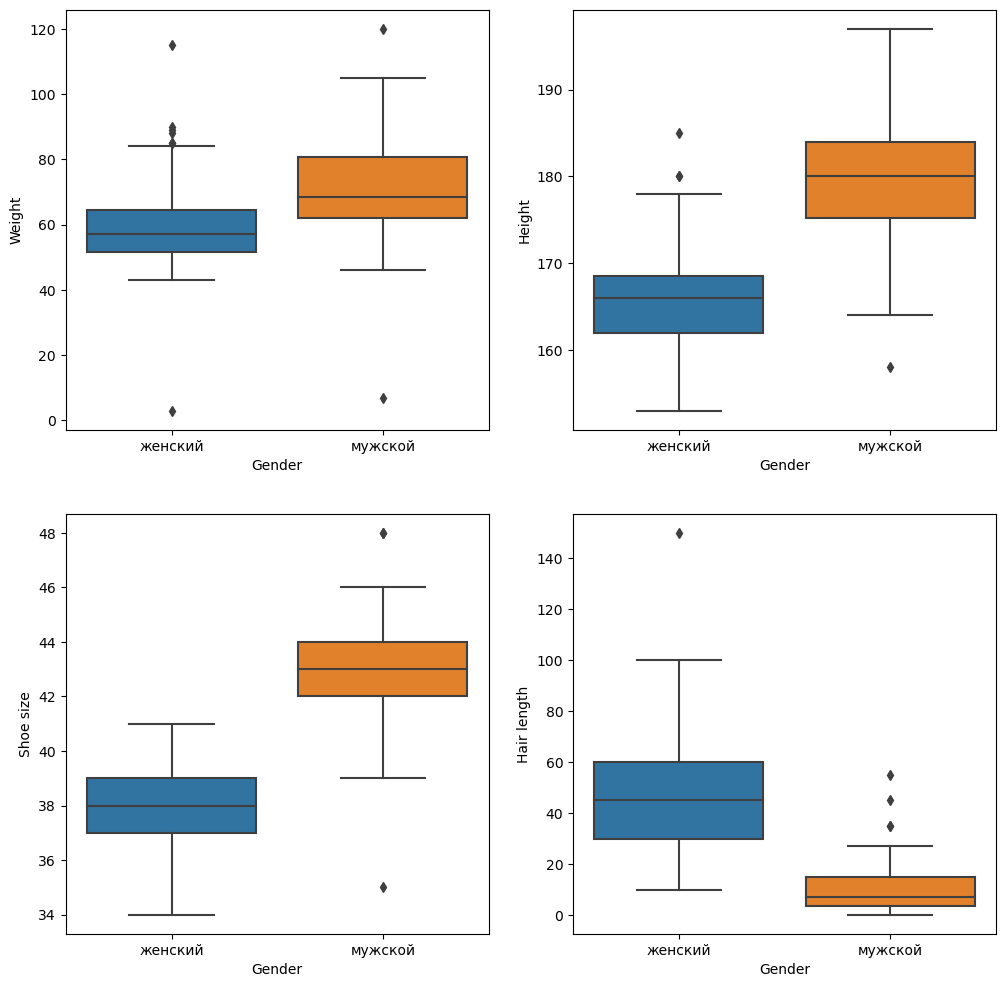

In [9]:
# построим несколько графиков для более удобного визуального анализа

fig, axes =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.boxplot(data=df, y="Weight", x="Gender", ax=axes[0,0])
sns.boxplot(data=df, y="Height", x="Gender", ax=axes[0,1])
sns.boxplot(data=df, y="Shoe size", x="Gender", ax=axes[1,0])
sns.boxplot(data=df, y="Hair length", x="Gender", ax=axes[1,1])

<AxesSubplot:xlabel='Hair length', ylabel='Count'>

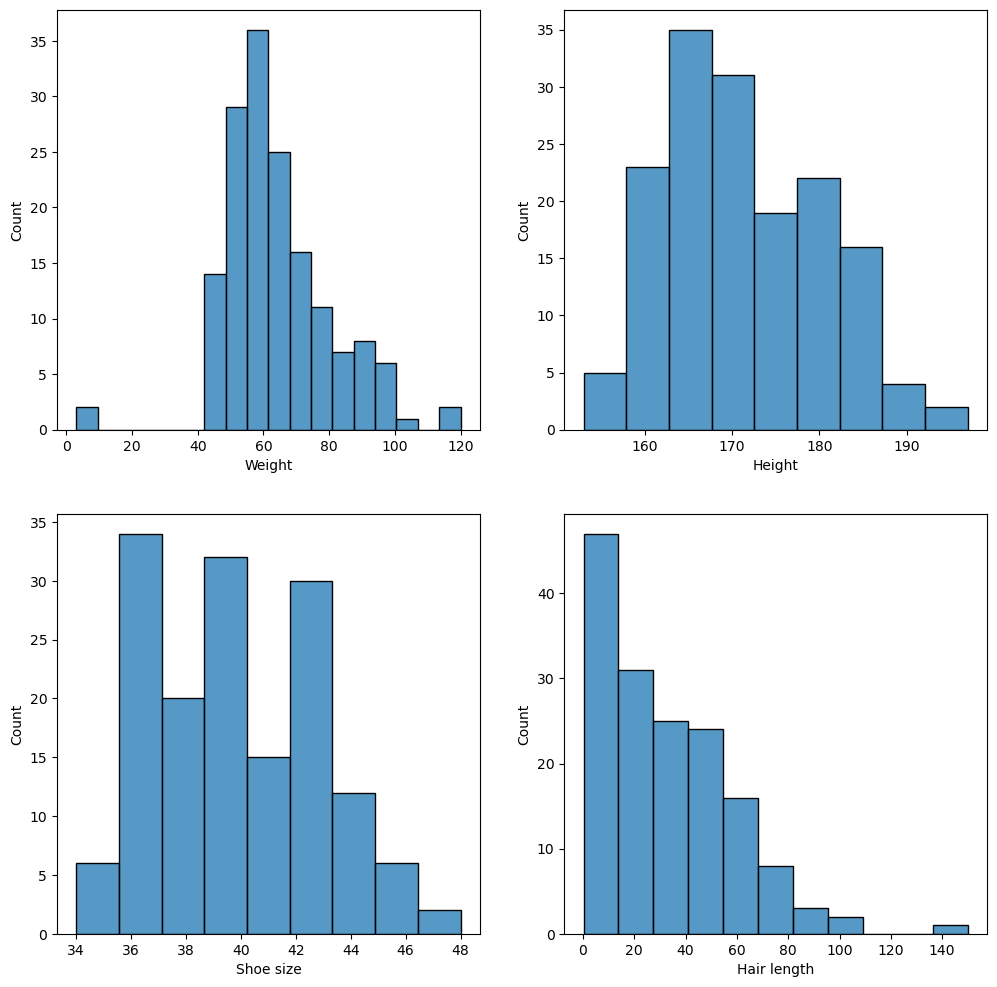

In [10]:
fig1, axes1 =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.histplot(data=df, x="Weight", ax=axes1[0,0])
sns.histplot(data=df, x="Height", ax=axes1[0,1])
sns.histplot(data=df, x="Shoe size", ax=axes1[1,0])
sns.histplot(data=df, x="Hair length", ax=axes1[1,1])

Больше всего напрягают 2 точки с низким весом. Их стоит выкинуть

In [11]:
# ограничим минимальный вес значением в 40 кг

df = df[(df['Weight']>40.0)]

In [12]:
df.describe()

,Age,Height,Shoe size,Weight,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,20.445161,171.187097,39.864516,64.793548,32.596129,9.961290,9.981935,28.055484
std,2.465718,9.228546,2.916762,15.164765,25.703049,4.609256,7.335685,11.184951
min,17.000000,153.000000,34.000000,43.000000,0.200000,0.000000,0.000000,0.000000
25%,19.000000,164.000000,37.500000,53.000000,10.000000,7.000000,6.000000,20.000000
50%,20.000000,170.000000,39.000000,61.000000,30.000000,10.000000,10.000000,30.000000
75%,21.000000,178.000000,42.000000,71.500000,50.000000,12.000000,12.000000,35.000000
max,35.000000,197.000000,48.000000,120.000000,150.000000,30.000000,80.000000,60.000000


<AxesSubplot:xlabel='Gender', ylabel='Hair length'>

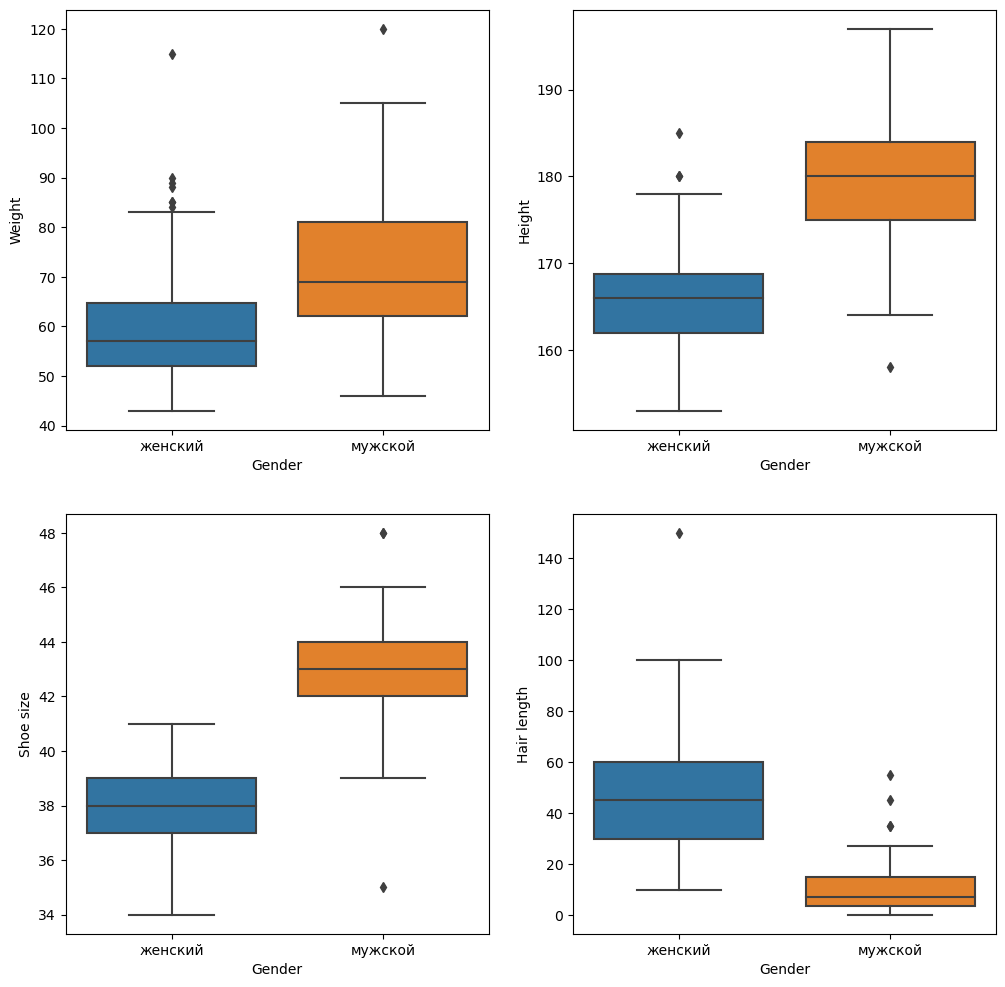

In [13]:
fig, axes =  plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
sns.boxplot(data=df, y="Weight", x="Gender", ax=axes[0,0])
sns.boxplot(data=df, y="Height", x="Gender", ax=axes[0,1])
sns.boxplot(data=df, y="Shoe size", x="Gender", ax=axes[1,0])
sns.boxplot(data=df, y="Hair length", x="Gender", ax=axes[1,1])

Теперь мы можем посмотреть на взаимодействия между переменными

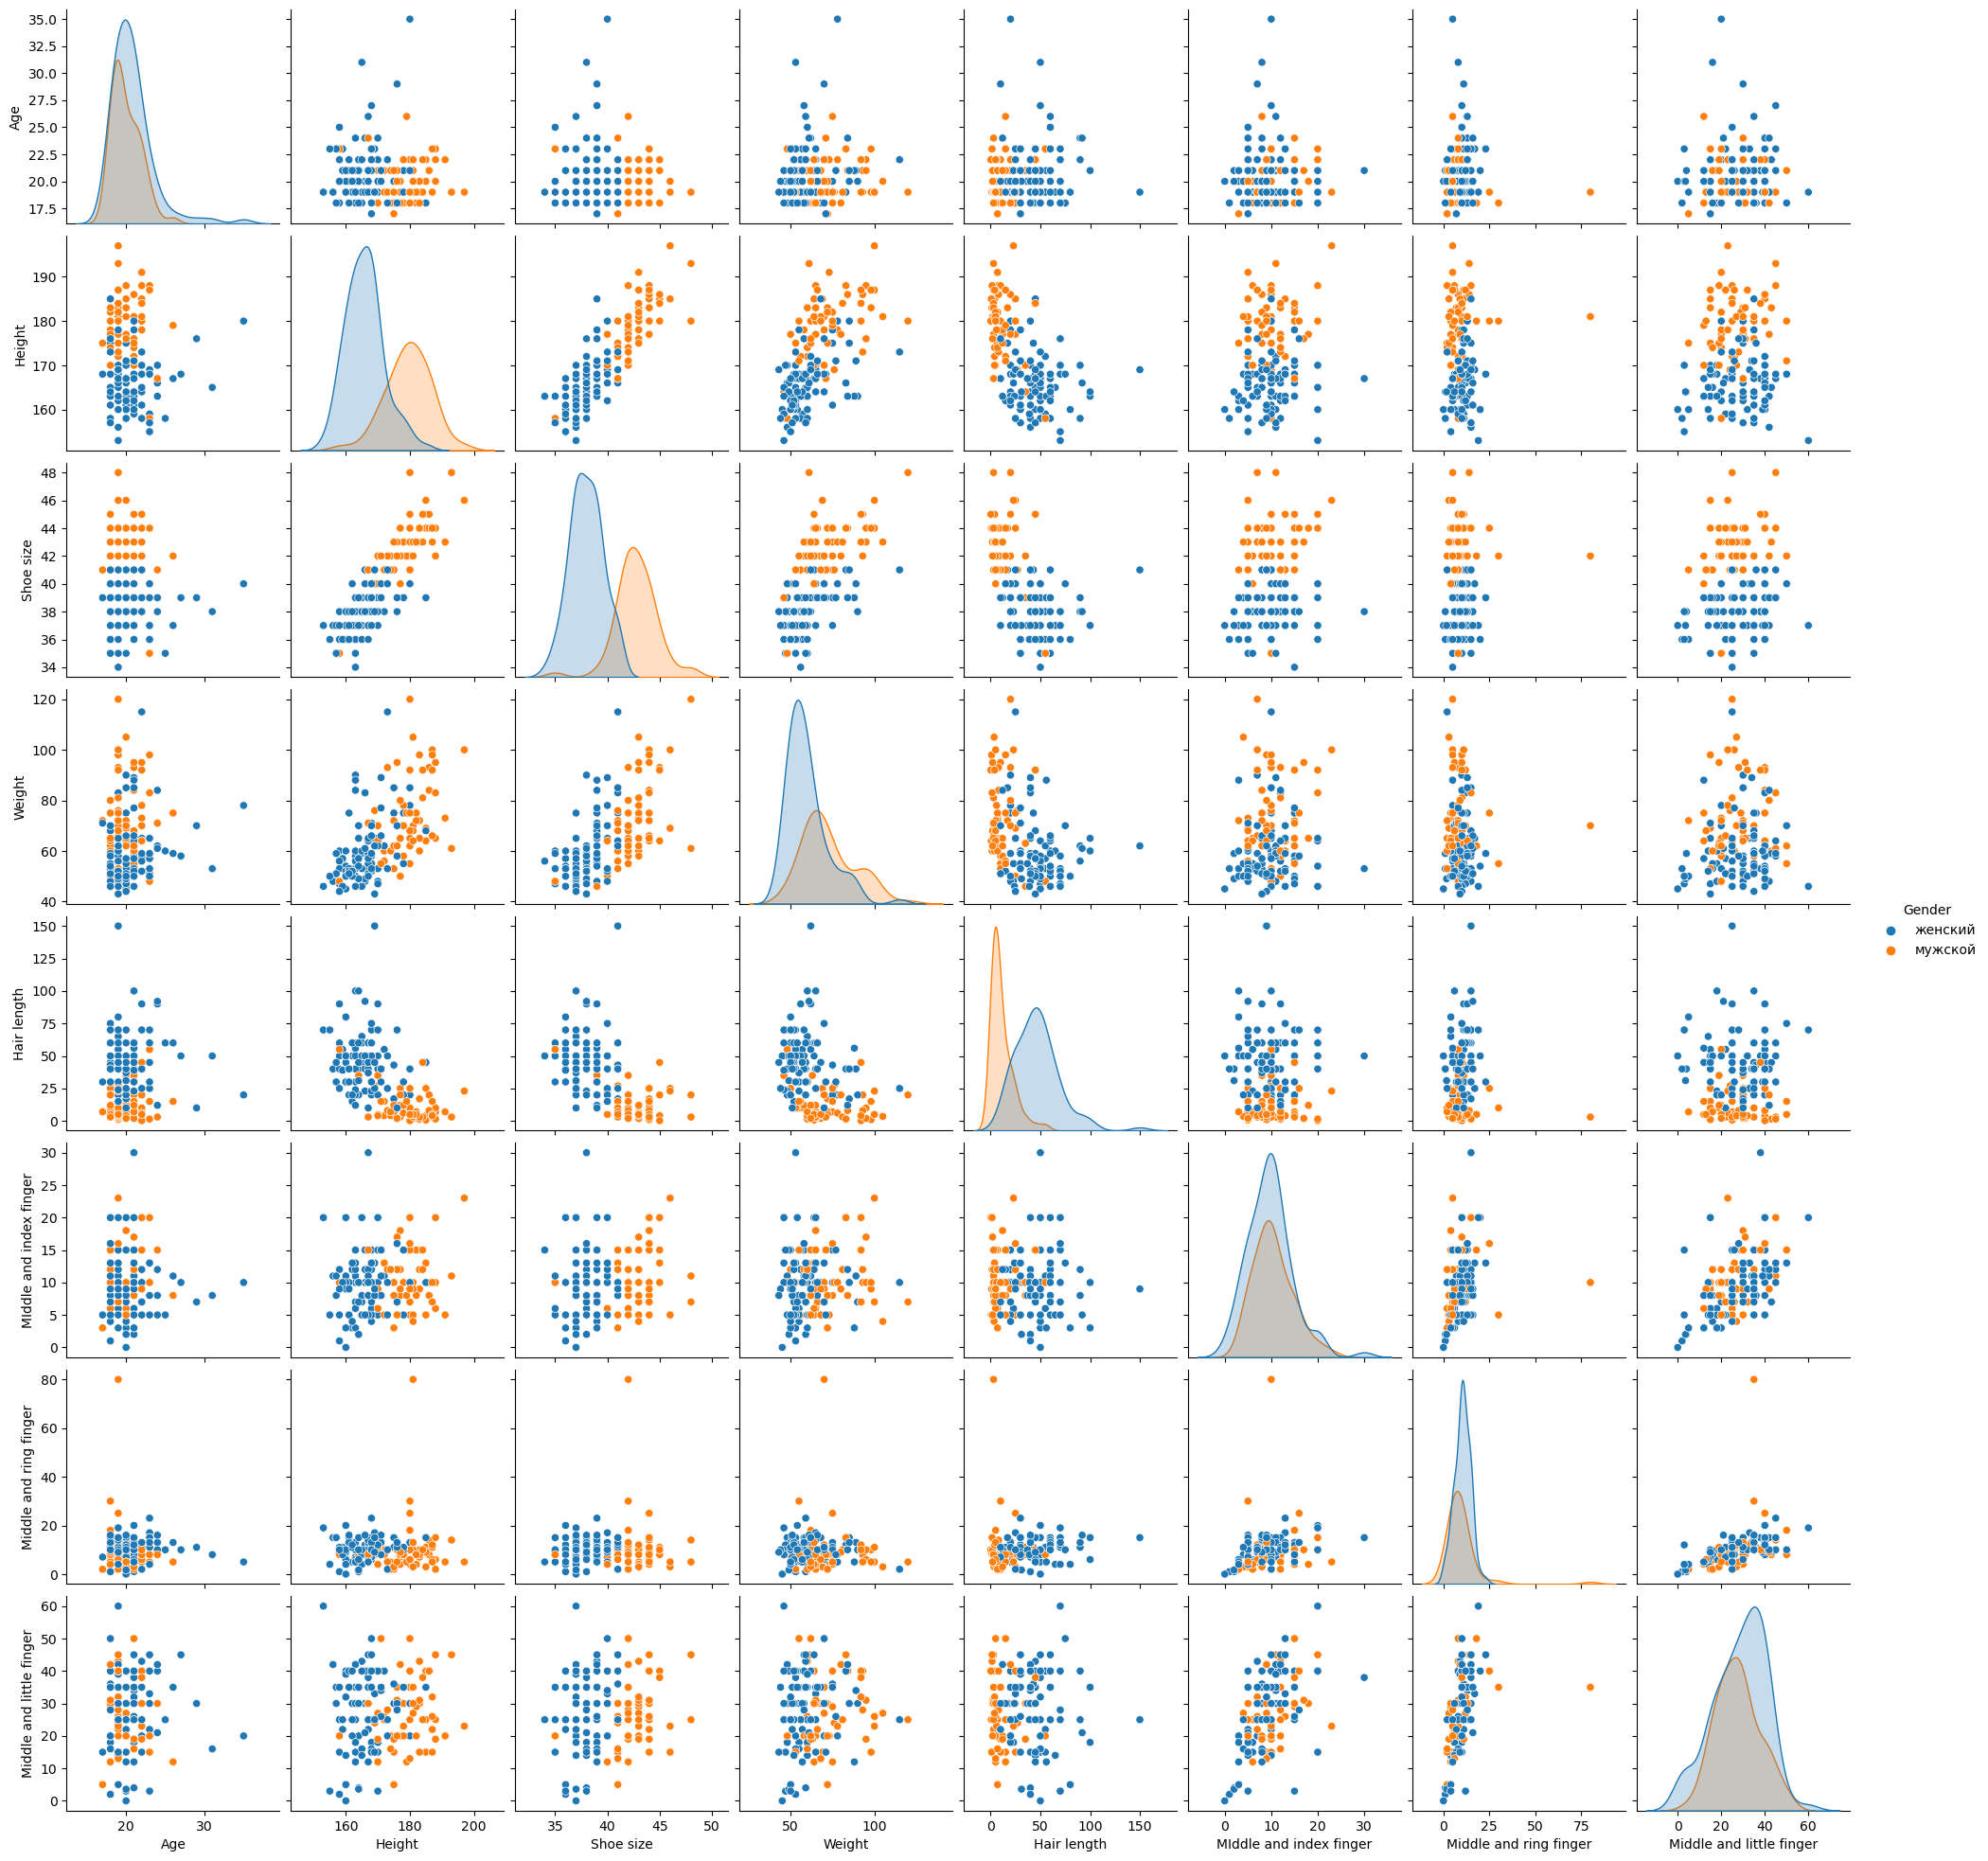

In [14]:
sns.pairplot(df, hue='Gender')

Видно, что по некоторым параметрам (рост, размер обуви, длина волос) мужчины и женщины заметно отличаются. Их и возьмем для построения моделей предсказания/кластеризации. До кучи добавим параметр "Вес". 

# 2 Тестовый датафрейм. Подготовка

In [15]:
# чтение файла

df_test = pd.read_csv("C:/Users/Dmitrii/Дима/Python projects/LogisticRegression/ML_methods_testing/students_test_cl.csv")

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       98 non-null     int64  
 1   Height                    98 non-null     float64
 2   Shoe size                 98 non-null     float64
 3   Weight                    77 non-null     float64
 4   Gender                    98 non-null     object 
 5   Hair length               98 non-null     float64
 6   MIddle and index finger   98 non-null     float64
 7   Middle and ring finger    98 non-null     int64  
 8   Middle and little finger  98 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 7.0+ KB


как и в прошлый раз имеются пробелы в значениях колонки "Weight"

In [17]:
df_test.head()

,Age,Height,Shoe size,Weight,Gender,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger
0,22,180.0,44.0,78.0,мужской,1.2,3.0,5,12
1,20,167.0,38.0,50.0,женский,30.0,9.0,12,50
2,21,178.0,41.0,70.0,женский,50.0,7.0,14,40
3,21,156.0,35.0,47.0,женский,20.0,5.0,7,10
4,22,186.0,44.0,94.0,мужской,8.0,10.0,10,35


In [18]:
# убираем строки с пропусками

df_test = df_test.dropna()

In [19]:
# проверяем что получилось

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       77 non-null     int64  
 1   Height                    77 non-null     float64
 2   Shoe size                 77 non-null     float64
 3   Weight                    77 non-null     float64
 4   Gender                    77 non-null     object 
 5   Hair length               77 non-null     float64
 6   MIddle and index finger   77 non-null     float64
 7   Middle and ring finger    77 non-null     int64  
 8   Middle and little finger  77 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 6.0+ KB


In [20]:
# посчитаем количество мужчин и женцин в тестовой выборке

df_test['Gender'].value_counts()

женский    47
мужской    30
Name: Gender, dtype: int64

# 3 Метод k-средних (наиболее популярный метод кластеризации)

### 3.1 Метод k-средних (без нормализации параметров)

In [21]:
# Вызываем метод. Обучаем модель. Как и говорилось выше, в качестве параметром берем вес, рост, размер обуви и длину волос. 

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df[['Weight', 'Height', 'Shoe size', 'Hair length']])

KMeans(n_clusters=2, random_state=0)

In [22]:
# Предсказываем пол по параметрам из тестовой выборки

kmeans_pred = kmeans.predict(df_test[['Weight', 'Height', 'Shoe size', 'Hair length']])

In [23]:
# строим матрицу ошибок

confusion_matrix (df_test['Gender']=='женский', kmeans_pred)

array([[29,  1],
       [10, 37]], dtype=int64)

In [24]:
# определяем точность предсказания

accuracy_score(y_true = (df_test['Gender']=='женский'), y_pred = kmeans_pred)

0.8571428571428571

**Промежуточный вывод:**  
Точность составила ~85.7%. С одной стороны, маловато. С другой, характеристики тела мужчин и женщин имеют широкие пересекающиеся диапазоны, что затрудняет предсказание.  
Из 30 реальных мужчин правильно определены/предсказаны 29, 1 интерпретирован как женщина.  
Из 47 реальных женщин правильно определены 37, 10 интерпретированы как мужчины.  

Посмотрим, как это выглядит на графиках.

In [25]:
df_test['kmeans_pred'] = kmeans_pred

<AxesSubplot:xlabel='Height', ylabel='Weight'>

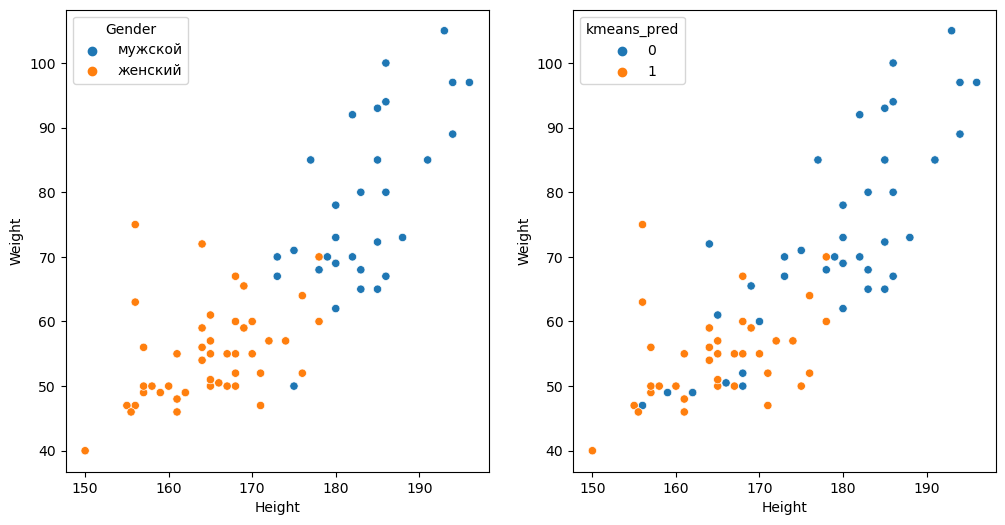

In [26]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(x = df_test['Height'], y=df_test['Weight'], hue=df_test['Gender'], ax=axes[0])
sns.scatterplot(x = df_test['Height'], y=df_test['Weight'], hue=df_test['kmeans_pred'], ax=axes[1])

Итак, вот наш неправильно предсказанный джентельмен, а неподалеку 10 его "подружек".
![](Kmeans_mistakes.jpg)

Вероятная причина ошибочного предсказания этого мужчины является его малый вес (по сравнению с остальными представителями мужского пола в данной выборке). Не удивлюсь, если у него еще и длинные волосы.

<AxesSubplot:xlabel='Height', ylabel='Hair length'>

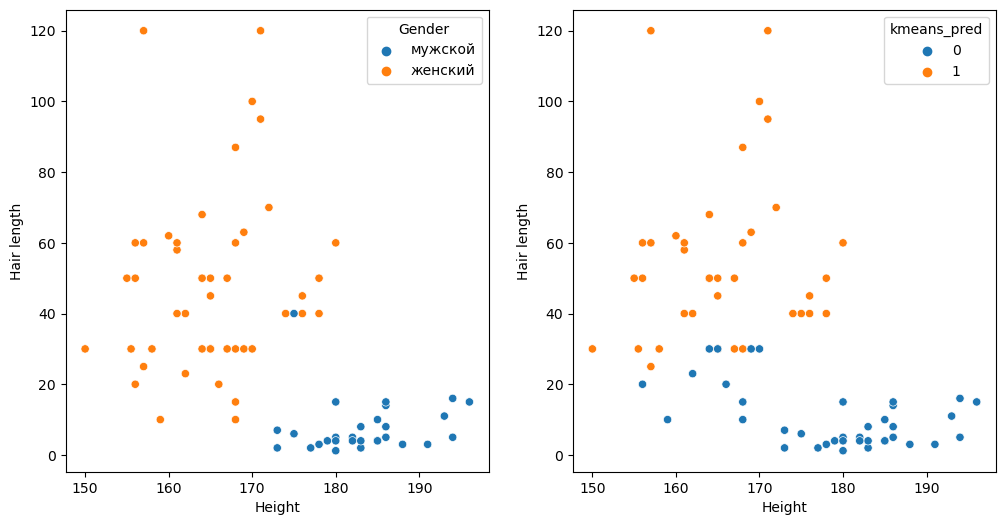

In [27]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(x = df_test['Height'], y=df_test['Hair length'], hue=df_test['Gender'], ax=axes[0])
sns.scatterplot(x = df_test['Height'], y=df_test['Hair length'], hue=df_test['kmeans_pred'], ax=axes[1])

Так и есть, у нашего "друга" волосы длиннее, чем у большинства мужчин в этой выборке.  
А у его "подружек" волосы короче, чем у большинства женщин в этой выборке.
![](Kmeans_mistakes_1.jpg)

Пожалуй, стоит поближе взглянуть на еще один параметр - "Размер обуви"

<AxesSubplot:xlabel='Height', ylabel='Shoe size'>

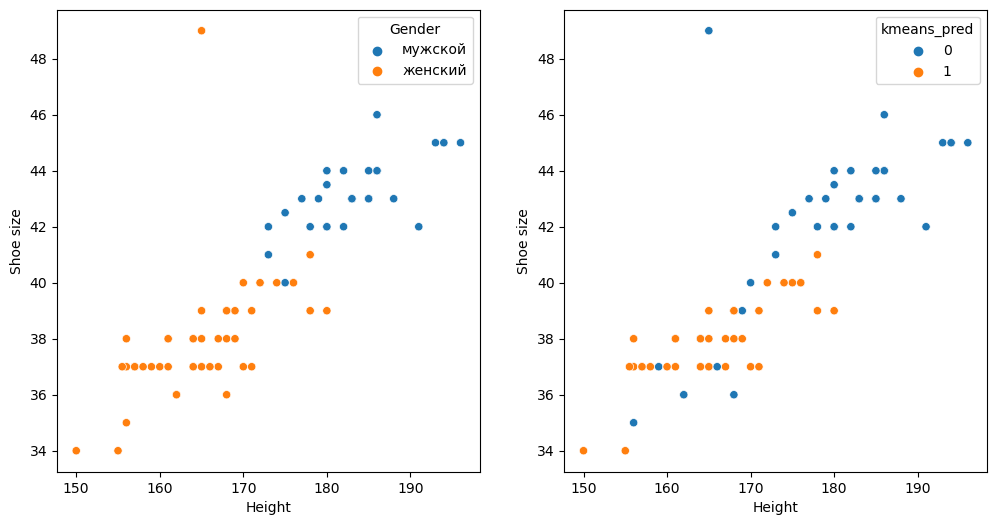

In [28]:
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(x = df_test['Height'], y=df_test['Shoe size'], hue=df_test['Gender'], ax=axes[0])
sns.scatterplot(x = df_test['Height'], y=df_test['Shoe size'], hue=df_test['kmeans_pred'], ax=axes[1])

Размер обуви у нашего "друга" оказался самым маленьким среди мужчин.  
Размер обуви одной из его "подруг" равен 49, что больше, чем у всех мужчин данной выборки. Это или ошибка при сборе данных, или намеренное искажение информации, или действительно имеющая место аномалия. Уверен, конкретно для данной женщины этот параметр и стал ключевым при классификации. 
![](Kmeans_mistakes_2.jpg)

С остальными неправильно определенными преставительницами женского пола не все так однозначно.  
Проверим, улучшится ли результат после нормализации данных.

### 3.2 Нормализация параметров датафреймов

In [29]:
# Проведем нормализацию параметров роста, веса, длины волос и размера обуви для основного и тестового датафреймов. 

# объявляем колонки, которые будем нормализовать. Надо было объявить эту переменную еще в начале, ну да ладно
columns = ['Height', 'Weight', 'Hair length', 'Shoe size']

# создаем стандартизатор-нормализатор и настраиваем его
scaler = StandardScaler()
scaler.fit(df[columns])

# непосредственно нормализация
df_norm = pd.DataFrame(scaler.transform(df[columns]), columns=columns)
df_test_norm = pd.DataFrame(scaler.transform(df_test[columns]), columns=columns)

# добавим колонки "Пол"
df_norm['Gender'] = df['Gender'].values
df_test_norm['Gender'] = df_test['Gender'].values

In [30]:
# проверка, что с колонка "Пол" без ошибок

print(all(df_norm['Gender'].values == df['Gender'].values))
print(all(df_test_norm['Gender'].values == df_test['Gender'].values))

True
True


### 3.3 Метод k-средних на нормализованных данных

In [31]:
# Вызываем метод. Обучаем модель. 

kmeans_norm = KMeans(n_clusters=2, random_state=0)
kmeans_norm.fit(df_norm[columns])

KMeans(n_clusters=2, random_state=0)

In [32]:
# Предсказываем пол по параметрам из тестовой выборки с нормализованными параметрами

kmeans_norm_pred = kmeans_norm.predict(df_test_norm[columns])

In [33]:
# строим матрицу ошибок

confusion_matrix(df_test_norm['Gender']=='мужской', kmeans_norm_pred)

array([[45,  2],
       [ 1, 29]], dtype=int64)

в этот раз модель за 1 взяла мужчин 

In [34]:
# определяем точность предсказания

accuracy_score(y_true = (df_test_norm['Gender']=='мужской'), y_pred = kmeans_norm_pred)

0.961038961038961

**Вывод:**  
Я считаю, получилось замечательно.  
Точность составила 96.1%. Важный урок усвоен: перед построением модели кластеризации нужно проводить нормализацию (*по крайней мере, при использовании KMeans*).    
По-прежнему, неправильно определился 1 мужчина (100% это наш старый худой и длинноволосый знакомый). Неправильно определенных женщин всего 2 (одна из который "ногастая", а на вторую мы сейчас посмотрим).

In [35]:
df_test_norm['kmeans_pred'] = kmeans_norm_pred

<AxesSubplot:xlabel='Height', ylabel='Shoe size'>

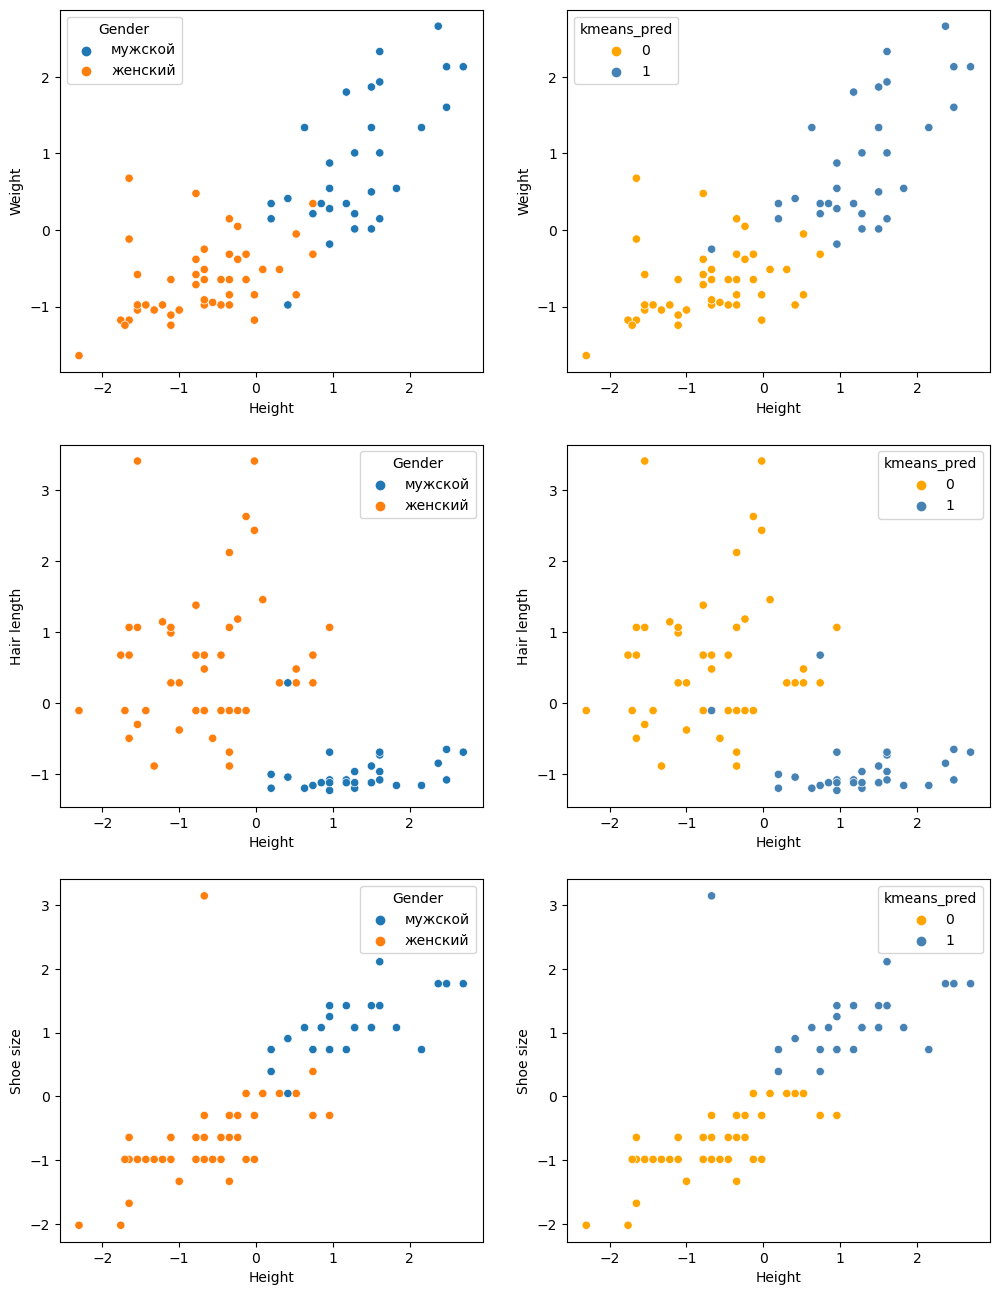

In [36]:
# сделаем сразу 3 пары графиков

fig, axes =  plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
sns.scatterplot(x = df_test_norm['Height'], y=df_test_norm['Weight'], hue=df_test_norm['Gender'], ax=axes[0, 0])
sns.scatterplot(x = df_test_norm['Height'], y=df_test_norm['Weight'], hue=df_test_norm['kmeans_pred'], palette=['orange', 'steelblue'], ax=axes[0, 1])

sns.scatterplot(x = df_test_norm['Height'], y=df_test_norm['Hair length'], hue=df_test_norm['Gender'], ax=axes[1, 0])
sns.scatterplot(x = df_test_norm['Height'], y=df_test_norm['Hair length'], hue=df_test_norm['kmeans_pred'], palette=['orange', 'steelblue'], ax=axes[1, 1])

sns.scatterplot(x = df_test_norm['Height'], y=df_test_norm['Shoe size'], hue=df_test_norm['Gender'], ax=axes[2, 0])
sns.scatterplot(x = df_test_norm['Height'], y=df_test_norm['Shoe size'], hue=df_test_norm['kmeans_pred'], palette=['orange', 'steelblue'], ax=axes[2, 1])

С неправильно определенным мужчиной все понятно - это действительно тот же парень.  
![](Kmeans_mistakes_3.jpg)

Вот "большеногая" девушка:

In [37]:
df_test_norm[df_test_norm['Shoe size']>3]

,Height,Weight,Hair length,Shoe size,Gender,kmeans_pred
59,-0.672603,-0.250966,-0.101332,3.142216,женский,1


Эта же девушка в исходной таблице:

In [38]:
df_test[df_test['Shoe size']>48]

,Age,Height,Shoe size,Weight,Gender,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger,kmeans_pred
70,19,165.0,49.0,61.0,женский,30.0,10.0,6,20,0


Со второй девушкой ситуация поинтереснее. До нормализации она определялась правильно (вероятно из-за достаточно длинных волос). Тем не менее, по сравнению с другими девушками, у нее довольно большой рост, вес и размер обуви, приближающие ее к группе мужчин. Это особенно отчетливо видно на графике "Рост" - "Вес". 

Вот эта девушка:

In [39]:
df_test_norm[(df_test_norm['Shoe size']>0.1) & (df_test_norm['Shoe size']<3) & (df_test_norm['Gender']=='женский')]

,Height,Weight,Hair length,Shoe size,Gender,kmeans_pred
2,0.740635,0.344438,0.679308,0.390558,женский,1


Она же в исходной таблице:

In [40]:
df_test[(df_test['Height']>170) & (df_test['Weight']>=70) & (df_test['Gender']=='женский')]

,Age,Height,Shoe size,Weight,Gender,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger,kmeans_pred
2,21,178.0,41.0,70.0,женский,50.0,7.0,14,40,1


Пора переходить к другому методу

# 4 Логистическая регрессия

### 4.1 Логистическая регрессия с оригинальными наборами данных

In [41]:
# создаем и обучаем модель

LR = LogisticRegression(solver='liblinear', multi_class='ovr')
LR.fit(X=df[columns], y=df['Gender'])

LogisticRegression(multi_class='ovr', solver='liblinear')

In [42]:
# совершаем предсказание

LR_pred = LR.predict(X=df_test[columns])

In [43]:
# построим матрицу ошибок

confusion_matrix(df_test['Gender'], LR_pred)

array([[44,  3],
       [ 1, 29]], dtype=int64)

In [44]:
# определим точность предсказания

accuracy_score(df_test['Gender'], LR_pred)

0.948051948051948

In [45]:
# коэффициенты логистического уравнения

LR.coef_

array([[-0.20013992, -0.01563647, -0.14069705,  0.97277196]])

**Промежуточные выводы**:  

Логистическая регрессия показывает точность 94.8 %. Очень хорошо.  
Неправильно определенных мужчин - 1 (и мы с вами уже догадываемся кто это ;-) ), неправильно определенных женщин - 3 (одна из которых, конечно же, "большеногая").  
Посмотрим кто эти люди.

In [46]:
df_test['LR_pred'] = LR_pred
df_test[(df_test['Gender']!=df_test['LR_pred'])]

,Age,Height,Shoe size,Weight,Gender,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger,kmeans_pred,LR_pred
17,19,159.0,37.0,49.0,женский,10.0,13.0,12,30,0,мужской
62,20,168.0,39.0,52.0,женский,15.0,13.0,10,33,0,мужской
70,19,165.0,49.0,61.0,женский,30.0,10.0,6,20,0,мужской
78,22,175.0,40.0,50.0,мужской,40.0,5.0,2,10,1,женский


<AxesSubplot:xlabel='Height', ylabel='Shoe size'>

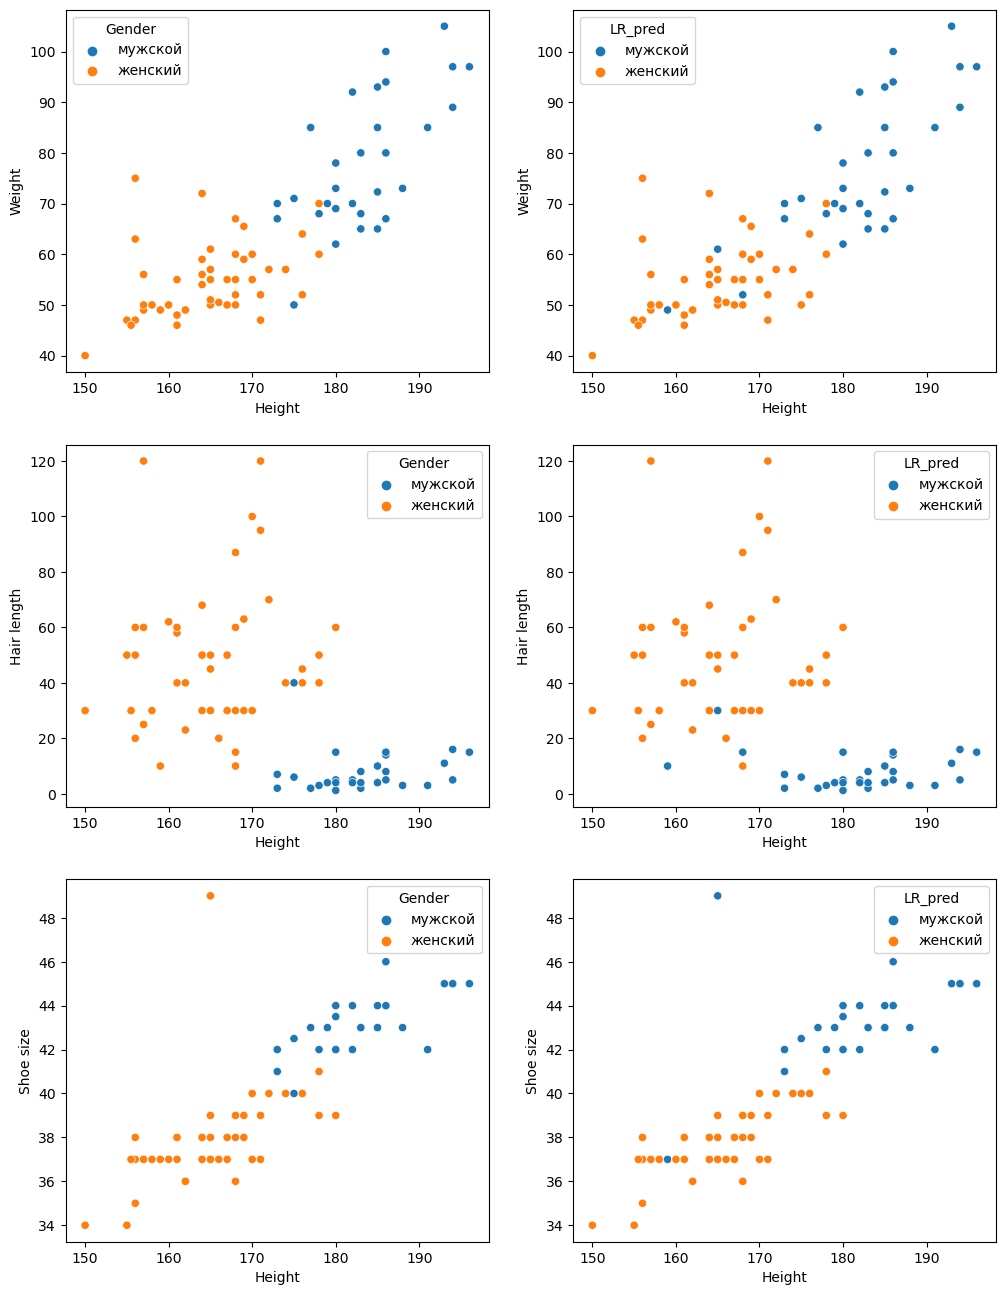

In [47]:
# опять 3 пары графиков

fig, axes =  plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
sns.scatterplot(x = df_test['Height'], y=df_test['Weight'], hue=df_test['Gender'], ax=axes[0, 0])
sns.scatterplot(x = df_test['Height'], y=df_test['Weight'], hue=df_test['LR_pred'], ax=axes[0, 1])

sns.scatterplot(x = df_test['Height'], y=df_test['Hair length'], hue=df_test['Gender'], ax=axes[1, 0])
sns.scatterplot(x = df_test['Height'], y=df_test['Hair length'], hue=df_test['LR_pred'], ax=axes[1, 1])

sns.scatterplot(x = df_test['Height'], y=df_test['Shoe size'], hue=df_test['Gender'], ax=axes[2, 0])
sns.scatterplot(x = df_test['Height'], y=df_test['Shoe size'], hue=df_test['LR_pred'], ax=axes[2, 1])

Если с "худощавым" и "большеногой" все понятно, то двух других девушек, по всей видимости, подвела очень короткая прическа.

### 4.2 Логистическая регрессия на нормализованных данных
Быстренько проверим изменится ли точность на нормализованных данных

In [48]:
# создаем и обучаем модель

LR_norm = LogisticRegression(solver='liblinear', multi_class='ovr')
LR_norm.fit(X=df_norm[columns], y=df_norm['Gender'])

LogisticRegression(multi_class='ovr', solver='liblinear')

In [49]:
# совершаем предсказание

LR_norm_pred = LR_norm.predict(X=df_test_norm[columns])

In [50]:
# построим матрицу ошибок

confusion_matrix(df_test_norm['Gender'], LR_norm_pred)

array([[46,  1],
       [ 1, 29]], dtype=int64)

In [51]:
# определим точность предсказания

accuracy_score(df_test_norm['Gender'], LR_norm_pred)

0.974025974025974

In [52]:
# коэффициенты логистического уравнения

LR_norm.coef_

array([[ 0.56951806, -0.63107929, -1.53271196,  2.46357217]])

**Вывод**:  

Точность 97.4 % против 94.8 до нормализации. Все-таки номализация нужна, даже если модель показывает хороший результат без нее. Нормализация помогает правильно определить принадлежность к классу/кластеру, если большая часть параметров находится в "зеленой" зоне. За бортом оказываются только *представители* с экстремальными значениями параметров.

# 5 Метод k-ближайших соседей (KNN)

### 5.1 KNN без нормализации

In [53]:
KNN = KNeighborsClassifier()
KNN.fit(X=df[columns], y=df['Gender'])

KNeighborsClassifier()

In [54]:
KNN_pred = KNN.predict(X=df_test[columns])

C:\Users\Dmitrii\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
confusion_matrix(df_test['Gender'], KNN_pred)

array([[46,  1],
       [ 1, 29]], dtype=int64)

In [56]:
accuracy_score(df_test['Gender'], KNN_pred)

0.974025974025974

**Предварительный вывод**:  
Точность метода k-ближайших соседей составила 97.4 %. Как у логистической регрессии после нормализации параметров датасета.  
Кто в неправильно определенных не будем даже смотреть, и так понятно. Или будем? Конечно, будем.

In [57]:
df_test['KNN_pred'] = KNN_pred
df_test[(df_test['Gender']!=df_test['KNN_pred'])]

,Age,Height,Shoe size,Weight,Gender,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger,kmeans_pred,LR_pred,KNN_pred
41,25,168.0,36.0,50.0,женский,10.0,3.0,3,7,0,женский,мужской
78,22,175.0,40.0,50.0,мужской,40.0,5.0,2,10,1,женский,женский


Худощавый длинноволосый паренек вполне ожидаем, а вот его "подругой" в этот раз оказалась не "большеногая" девушка, а одна из нескольких короткостриженных.

<AxesSubplot:xlabel='Height', ylabel='Shoe size'>

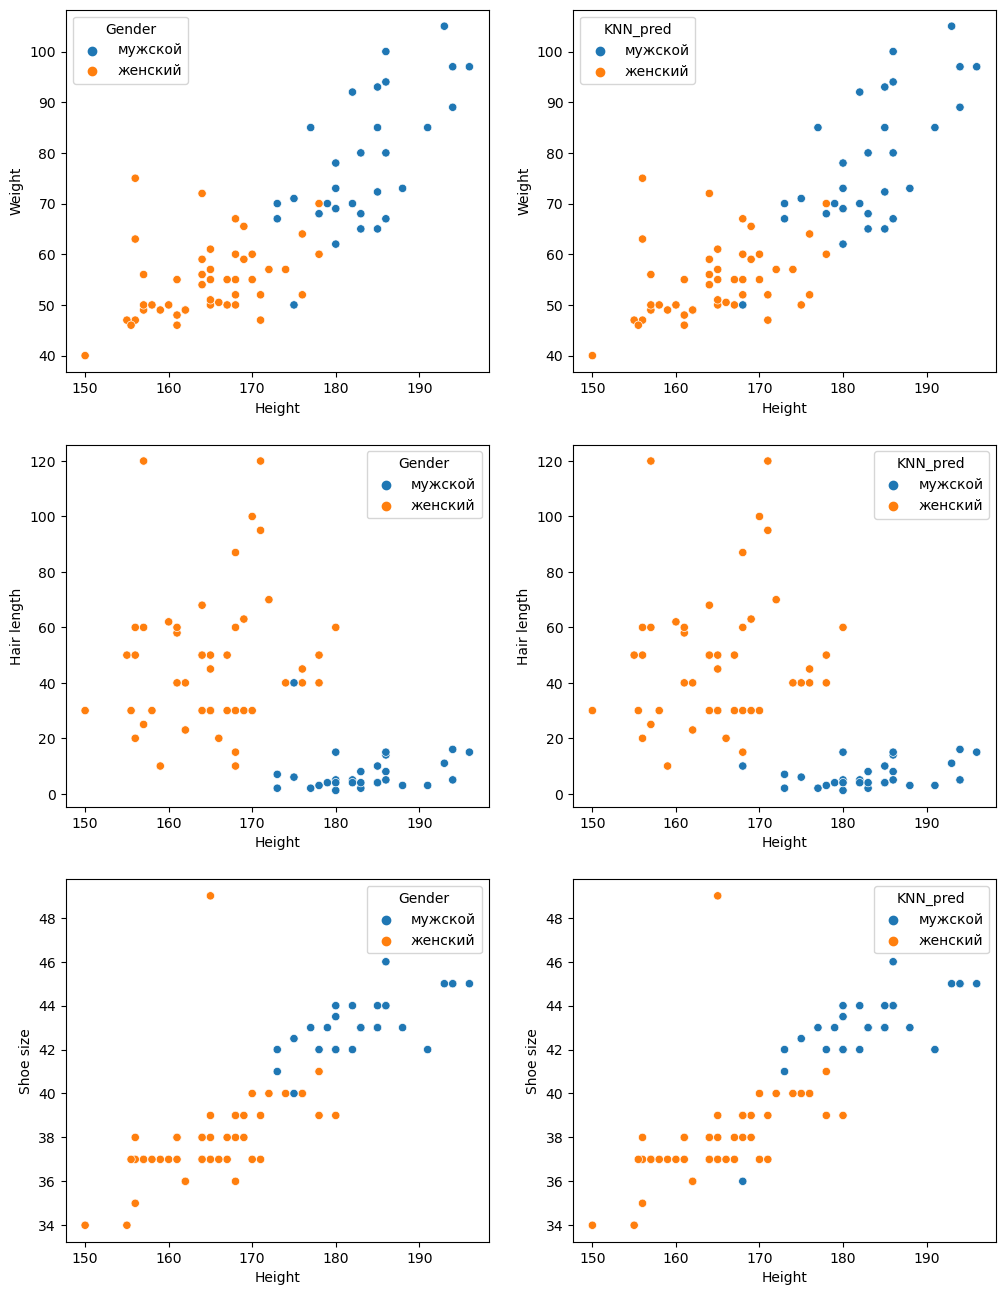

In [58]:
# графики для лучшего понимания ситуации

fig, axes =  plt.subplots(nrows=3, ncols=2, figsize=(12, 16))
sns.scatterplot(x = df_test['Height'], y=df_test['Weight'], hue=df_test['Gender'], ax=axes[0, 0])
sns.scatterplot(x = df_test['Height'], y=df_test['Weight'], hue=df_test['KNN_pred'], ax=axes[0, 1])

sns.scatterplot(x = df_test['Height'], y=df_test['Hair length'], hue=df_test['Gender'], ax=axes[1, 0])
sns.scatterplot(x = df_test['Height'], y=df_test['Hair length'], hue=df_test['KNN_pred'], ax=axes[1, 1])

sns.scatterplot(x = df_test['Height'], y=df_test['Shoe size'], hue=df_test['Gender'], ax=axes[2, 0])
sns.scatterplot(x = df_test['Height'], y=df_test['Shoe size'], hue=df_test['KNN_pred'], ax=axes[2, 1])

Что ж. Проверим, изменится ли точность метода после нормализации параметров.

### 5.2 KNN с нормализацией данных

In [59]:
KNN_norm = KNeighborsClassifier()
KNN_norm.fit(X=df[columns], y=df['Gender'])

KNeighborsClassifier()

In [60]:
KNN_norm_pred = KNN_norm.predict(X=df_test[columns])

C:\Users\Dmitrii\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
confusion_matrix(df_test['Gender'], KNN_norm_pred)

array([[46,  1],
       [ 1, 29]], dtype=int64)

In [62]:
accuracy_score(df_test['Gender'], KNN_norm_pred)

0.974025974025974

In [63]:
df_test['KNN_norm_pred'] = KNN_norm_pred
df_test[(df_test['Gender']!=df_test['KNN_norm_pred'])]

,Age,Height,Shoe size,Weight,Gender,Hair length,MIddle and index finger,Middle and ring finger,Middle and little finger,kmeans_pred,LR_pred,KNN_pred,KNN_norm_pred
41,25,168.0,36.0,50.0,женский,10.0,3.0,3,7,0,женский,мужской,мужской
78,22,175.0,40.0,50.0,мужской,40.0,5.0,2,10,1,женский,женский,женский


Результат после нормализации не изменился.

**Вывод**:
Метод k-ближайших соседей \[в нашем случае\] показал максимальный результат даже без нормализации параметров датасета.